Training Accuracy: 0.9270833333333334
Testing Accuracy: 0.8958333333333334

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.86      0.92         7
           2       1.00      1.00      1.00         6
           3       0.89      1.00      0.94         8
           4       0.70      0.88      0.78         8
           5       1.00      0.73      0.84        11

    accuracy                           0.90        48
   macro avg       0.91      0.91      0.90        48
weighted avg       0.91      0.90      0.90        48

Confusion Matrix:
[[8 0 0 0 0 0]
 [1 6 0 0 0 0]
 [0 0 6 0 0 0]
 [0 0 0 8 0 0]
 [0 0 0 1 7 0]
 [0 0 0 0 3 8]]
Precision: [0.88888889 1.         1.         0.88888889 0.7        1.        ]
Recall: [1.         0.85714286 1.         1.         0.875      0.72727273]
Specificity: 0.8571428571428571
F1 Score: [0.94117647 0.92307692 1.         0.94117647 0.77777

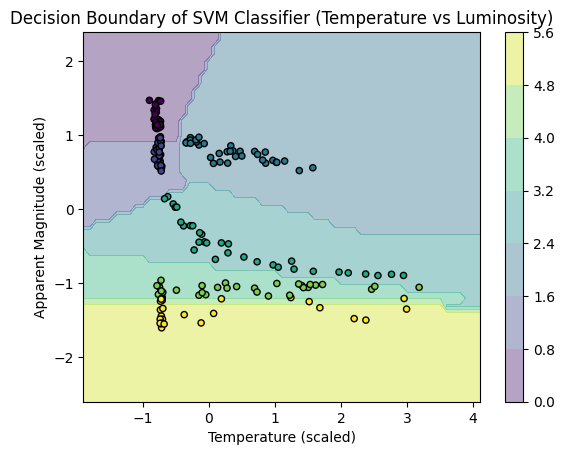

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load data
data = pd.read_csv('/content/Stars_data.csv')

# Encode categorical variables
label_encoder = LabelEncoder()
data['Spectral_Class'] = label_encoder.fit_transform(data['Spectral_Class'])
data['Type'] = label_encoder.fit_transform(data['Type'])

# Define features and target
X = data[['Temperature', 'A_M']]
y = data['Type']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train_scaled, y_train)

# Predict on training and testing sets
y_pred_train = svm_classifier.predict(X_train_scaled)
y_pred_test = svm_classifier.predict(X_test_scaled)

# Calculate evaluation metrics
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
class_report = classification_report(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Calculate precision
precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)

# Calculate recall
recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)

# Calculate specificity
specificity = (conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1]))

# Calculate F1 score
f1_score = 2 * (precision * recall) / (precision + recall)

# Calculate G measure
g_measure = np.sqrt(precision * recall)

# Calculate weighted average of G measure
weighted_avg_g_measure = np.average(g_measure, weights=np.sum(conf_matrix, axis=1))

# Print evaluation metrics
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

print("\nClassification Report:")
print(class_report)

print("Confusion Matrix:")
print(conf_matrix)

print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1_score)
print("G Measure:", g_measure)
print("Weighted Average G Measure:", weighted_avg_g_measure)

# Plot decision boundary
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
svm_classifier.fit(X_train_scaled[:, :2], y_train)
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.colorbar()
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, s=20, edgecolor='k')
plt.xlabel('Temperature (scaled)')
plt.ylabel('Apparent Magnitude (scaled)')
plt.title('Decision Boundary of SVM Classifier (Temperature vs Luminosity)')
plt.show()

